# Part I 

[Gas sensors for home activity monitoring Data Set](https://archive.ics.uci.edu/ml/datasets/Gas+sensors+for+home+activity+monitoring)


[KNN](https://github.com/eriklindernoren/ML-From-Scratch/blob/master/mlfromscratch/supervised_learning/k_nearest_neighbors.py)

[ML-From-Scratch Logistic Regression](https://github.com/eriklindernoren/ML-From-Scratch/blob/master/mlfromscratch/supervised_learning/logistic_regression.py)

[Numpy LR](https://blog.goodaudience.com/logistic-regression-from-scratch-in-numpy-5841c09e425f)

## Preprocessing

In [1]:
import numpy as np

In [380]:
metadata=np.loadtxt("./data/HT_Sensor_UCIsubmission/HT_Sensor_metadata.dat",skiprows=1,dtype=str)

In [3]:
metadata[metadata[:,2]=="background",2]=2
metadata[metadata[:,2]=="banana",2]=0
metadata[metadata[:,2]=="wine",2]=1

metadata=np.array(metadata[:,[0,2,3,4]],dtype=float)

In [4]:
dataset = np.loadtxt('./data/HT_Sensor_UCIsubmission/HT_Sensor_dataset.dat', skiprows=1)
datasetID=np.array(dataset[:,0],dtype=int)

In [5]:
# 仅仅挑选ID为banana与wine的
# 以及时间恰好有这两者存在的时间区间
selected = np.logical_and(metadata[datasetID,1]!=2,dataset[:,1]>0,dataset[:,1]<metadata[datasetID,3])
data=dataset[selected]
dataID=np.array(data[:,0],dtype=int)
data[:,0]=metadata[dataID,1]

#混淆in-place
np.random.shuffle(data)
#归一化
dataID=np.array(data[:,0],dtype=int)
data=(data-data.mean(axis=0))/data.std(axis=0)
data[:,0]=dataID
np.save("./data/HT_Sensor_UCIsubmission/data.npy",data)

## KNN

In [6]:
import numpy as np
from collections import Counter

In [207]:
data=np.load("./data/HT_Sensor_UCIsubmission/data.npy")
test_size=data.shape[0]//2
#分割train test 10%
X_test=data[:test_size,2:10]
y_test=data[:test_size,0].astype('int')

X_train=data[test_size:,2:10]
y_train=data[test_size:,0].astype('int')

print(X_test.shape,y_test.shape,X_train.shape,y_train.shape,data.shape)

(208227, 8) (208227,) (208228, 8) (208228,) (416455, 12)


In [151]:
class KNN():
    def __init__(self, k=5):
        self.k = k

    def predict(self, X_test, X_train, y_train):
        y_pred=np.empty(X_test.shape[0],dtype=int)
        for i,X in enumerate(X_test):
            if i%100 ==0:
                print(i)
            y_pred[i]=np.bincount(y_train[np.argsort(np.linalg.norm(X-X_train,axis=1))[:self.k]]).argmax()
        return y_pred

In [152]:
model=KNN(1)
y_pred=model.predict(X_test[:],X_train[:],y_train)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [155]:
result=Counter(np.equal(y_pred[:],y_test[:])).most_common()
result

[(True, 41638), (False, 7)]

```python
result=Counter(np.equal(y_pred[:],y_test[:])).most_common()
result
```
```python
[(True, 41638), (False, 7)]
```

## Logistic Regression

In [73]:
import numpy as np
from collections import Counter
import math

In [74]:
data=np.load("./data/HT_Sensor_UCIsubmission/data.npy")
test_size=data.shape[0]//10
#分割train test 10%
X_test=data[:test_size,2:10]
y_test=data[:test_size,0].astype('int')

X_train=data[test_size:,2:10]
y_train=data[test_size:,0].astype('int')

print(X_test.shape,y_test.shape,X_train.shape,y_train.shape,data.shape)

(41645, 8) (41645,) (374810, 8) (374810,) (416455, 12)


In [77]:
LOSS=[]
class LogisticRegression():
    def __init__(self,lr=0.1):
        self.lr=lr
        
    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))
    
    def loss(self,y,y_hat):
        return -np.mean(y * np.log(y_hat)+(1-y)*np.log(1-y_hat))
    
    def fit(self,X_train,y_train,epochs=5000):
        limit=1/math.sqrt(X_train.shape[1])
        self.W=np.random.uniform(-limit,limit,(X_train.shape[1],))
        
        for i in range(epochs):
            y_hat=self.sigmoid(X_train @ self.W)
            self.W -= self.lr * (X_train.T @ (y_hat - y_train) / y_train.shape[0])
            temp_loss=self.loss(y_train,y_hat)
            LOSS.append((i,temp_loss))
            if i %100 ==0:
                print(i,temp_loss)
                
    def predict(self,X_test):
        y_pred=self.sigmoid(X_test @ self.W)>0.5
        return y_pred.astype('int')

In [78]:
model=LogisticRegression(0.25)
model.fit(X_train,y_train,5000)
y_pred=model.predict(X_test)

0 0.6892937625690148
100 0.5705850194091441
200 0.568840731312909
300 0.5685419181145815
400 0.5684229031447733
500 0.5683513179944791
600 0.5683028854088324
700 0.5682690208158084
800 0.5682450245670334
900 0.568227890254225
1000 0.5682155928792081
1100 0.5682067354200419
1200 0.5682003395516986
1300 0.5681957129462307
1400 0.5681923619703815
1500 0.5681899327563505
1600 0.5681881706475592
1700 0.568186891878356
1800 0.5681859635797617
1900 0.5681852895494186
2000 0.5681848000645129
2100 0.5681844445581338
2200 0.5681841863382391
2300 0.5681839987712994
2400 0.5681838625201528
2500 0.5681837635426814
2600 0.5681836916406194
2700 0.568183639406697
2800 0.5681836014604813
2900 0.5681835738936037
3000 0.5681835538669194
3100 0.5681835393179492
3200 0.5681835287483935
3300 0.5681835210697914
3400 0.5681835154914094
3500 0.5681835114387987
3600 0.5681835084946353
3700 0.5681835063557417
3800 0.5681835048018641
3900 0.5681835036729925
4000 0.5681835028528821
4100 0.5681835022570824
4200 0.5

In [64]:
Counter(y_pred == y_test).most_common()

[(True, 28829), (False, 12816)]

In [1]:
28829/(28829+12816)

0.6922559731060152

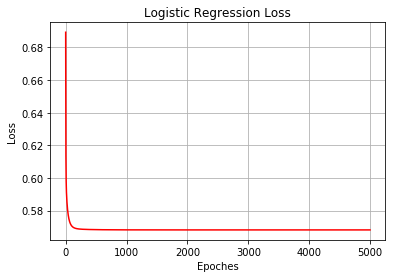

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
plt.plot([i[0] for i in LOSS],[i[1] for i in LOSS],'r')
plt.title("Logistic Regression Loss")
plt.grid(True)
plt.ylabel("Loss")
plt.xlabel("Epoches")
plt.savefig("./graph/PartI-LR.png",dpi=1000)
plt.show()